In [1]:
!pip install pandas pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from scipy.signal import detrend

# Assuming your data is in a pandas Series called 'data'
detrended_data = detrend(data['StorageChange'])  # Detrend the 'StorageChange' column


NameError: name 'data' is not defined

In [6]:
!pip install scipy statsmodels


In [7]:
# Install libraries if needed
!pip install scipy statsmodels

# Import libraries
import pandas as pd
from scipy.signal import detrend  # Option 1
import statsmodels.api as sm      # Option 2

# Load your data
data = pd.read_csv('Book7.csv', index_col='Date', parse_dates=True)

# Choose a detrending method and detrend
detrended_data = detrend(data['StorageChange'])  # Option 1 - Linear

# Or, using statsmodels
detrended_data = sm.tsa.tsatools.detrend(data['StorageChange'], order=1)  # Option 2

# Save detrended data
detrended_data.to_csv('detrended_data.csv')


In [9]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00


In [10]:
import pmdarima as pm

# Fit the SARIMA model
model = pm.auto_arima(detrended_data, stepwise=True, trace=True,
                      suppress_warnings=True)
print(model.summary())  # View model summary


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2844.331, Time=2.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3223.571, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2846.031, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3039.759, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3221.571, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2842.929, Time=0.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2945.120, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2841.487, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2842.360, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2840.819, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2842.445, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2844.345, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2838.876, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2844.067, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]          

In [11]:
n_periods = 26  # Specify the number of periods to forecast

# Generate Forecasts
forecasts = model.predict(n_periods=n_periods)  # Store the forecasts
forecasts = pd.Series(forecasts, index=pd.date_range(start=detrended_data.index[-1], periods=n_periods+1, freq='W')[1:]) # Generate a DatetimeIndex based on the last date in the original data (you might need to adjust offset and freq).


In [12]:
import numpy as np

trend_component = np.arange(n_periods + 1) * np.mean(data['StorageChange'].diff().dropna())

# Add back the trend component
reconstructed_forecasts = forecasts + trend_component[:-1] # Account for index offset


In [15]:
detrended_data.to_csv('detrended_data.csv')


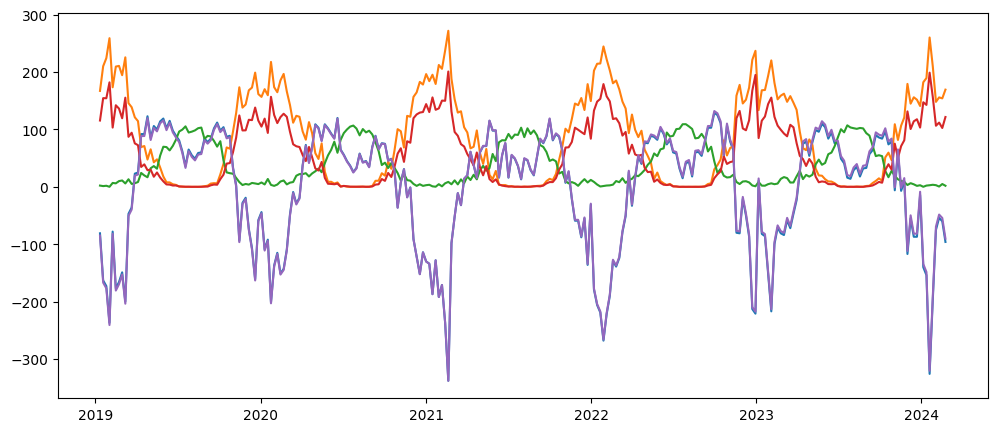

In [13]:
import matplotlib.pyplot as plt

# Plot your original data, detrended data, and the forecast
plt.figure(figsize=(12, 5))
plt.plot(data)
plt.plot(detrended_data)
plt.plot(reconstructed_forecasts)
plt.show()


In [16]:
import pmdarima as pm

# Specify the number of periods you want to forecast
n_periods = 12  # Example: Forecast the next 12 weeks

# Generate forecasts
forecasts = model.predict(n_periods=n_periods)

# Generate a DatetimeIndex based on the last date in the original data (you might need to adjust offset and freq)
forecasts = pd.Series(forecasts, index=pd.date_range(start=detrended_data.index[-1], periods=n_periods+1, freq='W')[1:])


In [17]:
import numpy as np

# Trend adjustment (assuming a roughly linear trend)
trend_component = np.arange(n_periods + 1) * np.mean(data['StorageChange'].diff().dropna())

# Add the trend back to the forecasts
reconstructed_forecasts = forecasts + trend_component[:-1] # Account for index offset


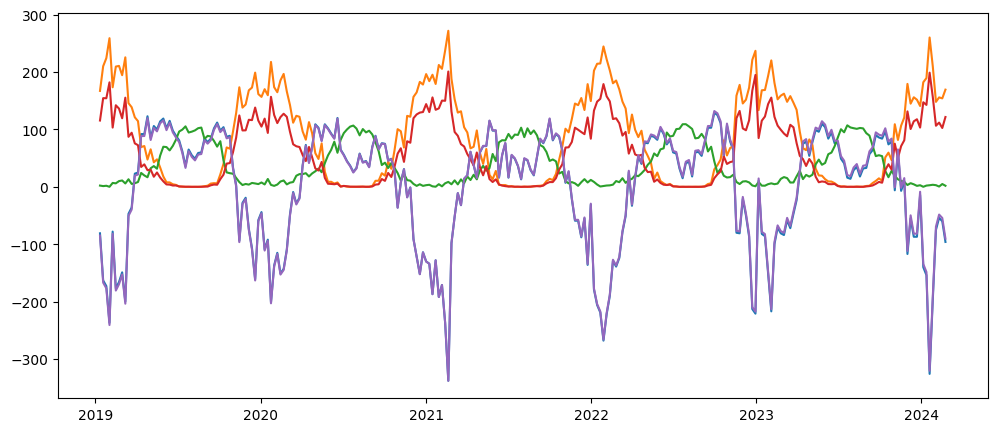

In [18]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(data)
plt.plot(detrended_data)
plt.plot(reconstructed_forecasts)
plt.show()


In [20]:
import pandas as pd

# Load your data from CSV
data = pd.read_csv('Book7.csv', index_col='Date', parse_dates=True)

# Inspect your data
print(data.head())  # View the first few rows
print(data.info())  # Check data types and missing values


            StorageChange    HDD  CDD  ElectricHDD
Date                                              
2019-01-11            -81  167.2  2.2        115.6
2019-01-18           -163  210.2  1.3        154.6
2019-01-25           -173  224.3  1.9        154.4
2019-02-01           -237  259.1  0.1        182.1
2019-02-08            -78  173.5  6.8        103.3
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2019-01-11 to 2024-02-23
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StorageChange  268 non-null    int64  
 1   HDD            268 non-null    float64
 2   CDD            268 non-null    float64
 3   ElectricHDD    268 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.5 KB
None


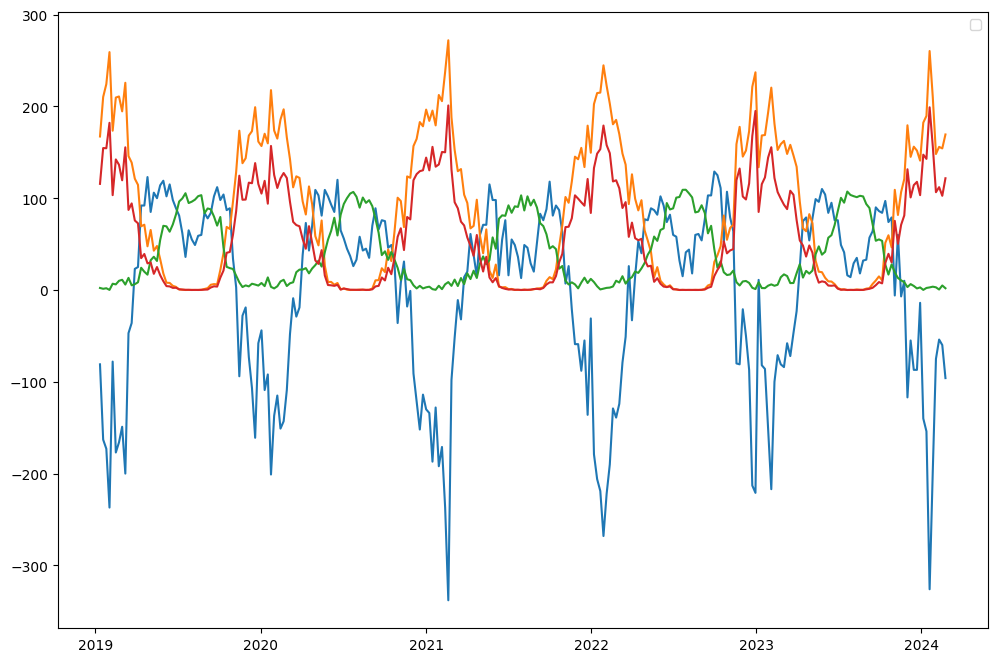

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(data['StorageChange'])
plt.plot(data['HDD'])
plt.plot(data['CDD'])
plt.plot(data['ElectricHDD'])
plt.legend()  # Add a legend
plt.show()


In [22]:
# Create a differenced version of StorageChange
data['StorageChange_diff'] = data['StorageChange'].diff()
print(data['StorageChange_diff'].head())


Date
2019-01-11      NaN
2019-01-18    -82.0
2019-01-25    -10.0
2019-02-01    -64.0
2019-02-08    159.0
Name: StorageChange_diff, dtype: float64


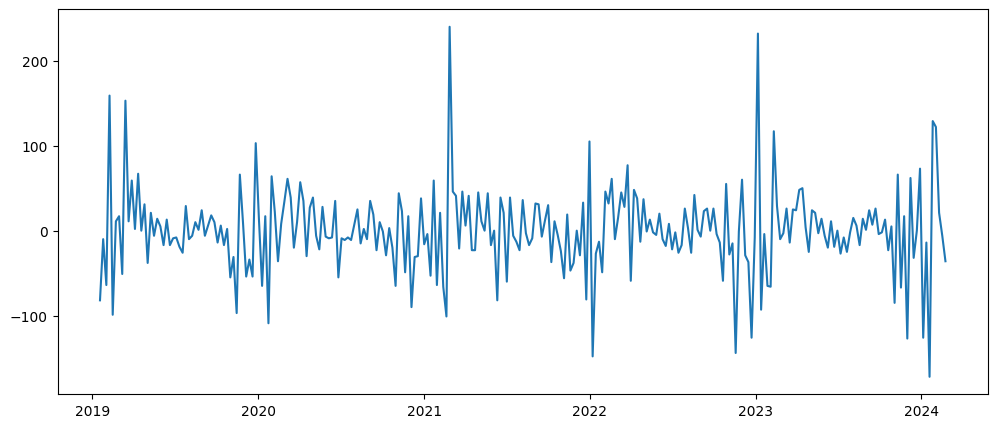

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(data['StorageChange_diff'])
plt.show()


In [25]:
print(data['StorageChange_diff'].isnull().sum())


1


In [26]:
data = data.dropna()


In [27]:
# Import pmdarima
import pmdarima as pm

# Use the differenced storage change for modeling
model = pm.auto_arima(data['StorageChange_diff'],
                      exogenous=data[['HDD', 'CDD', 'ElectricHDD']],
                      stepwise=True,  # Try different parameter combinations
                      seasonal=True,  # Consider seasonality
                      suppress_warnings=True)  # Hide warnings about small sample size

# Print the model details
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  267
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1416.468
Date:                Tue, 19 Mar 2024   AIC                           2836.935
Time:                        20:40:22   BIC                           2844.110
Sample:                    01-18-2019   HQIC                          2839.817
                         - 02-23-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2246      0.044     -5.124      0.000      -0.311      -0.139
sigma2      2373.6471    128.737     18.438      0.000    2121.327    2625.967
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [28]:
# Specify the number of periods to forecast (you wanted 26)
n_periods = 26

# Generate forecasts for 'StorageChange_diff'
forecasts_diff = model.predict(n_periods=n_periods, exogenous=data[['HDD', 'CDD', 'ElectricHDD']])


In [29]:
# Simulate adding the trend back (assuming a somewhat linear trend from observation)
trend_component = np.arange(n_periods + 1) * np.mean(data['StorageChange'].diff().dropna())
reconstructed_forecasts = forecasts_diff.cumsum() + trend_component[:-1] + data['StorageChange'].iloc[-1]


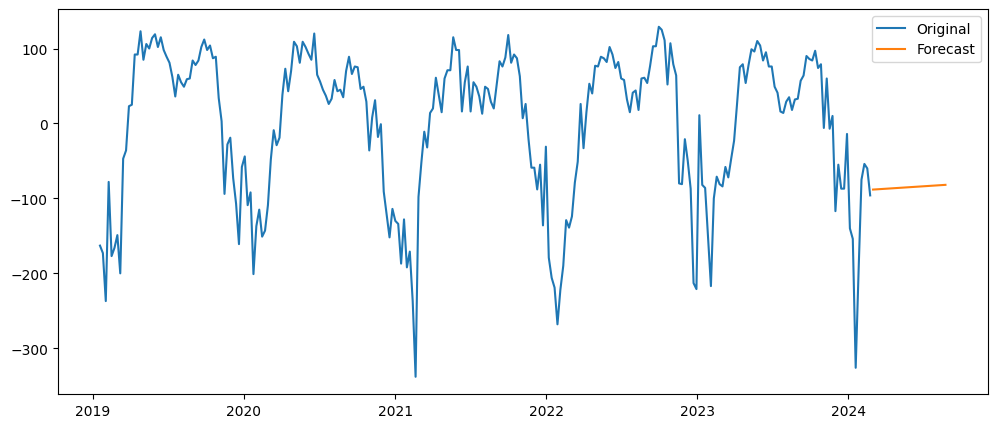

In [30]:
plt.figure(figsize=(12, 5))
plt.plot(data['StorageChange'])
plt.plot(reconstructed_forecasts)
plt.legend(['Original', 'Forecast'])
plt.show()
